1. Group the data by day and build two plots for the grouped data:
1.1. A plot of the daily total advertising spend in 2021.
1.2. A plot of the daily ROMI in 2021.
1.3. Bonus mini-task: use the rolling() method to show the moving average of spend and ROMI.

2. Group the data by campaign name and build two plots:
2.1. A plot of the total advertising spend for each campaign.
2.2. A plot of the overall ROMI for each campaign.

3. Using a box plot, determine the distribution (spread) of daily ROMI within each campaign (by campaign name).

4. Build a histogram showing the distribution of ROMI values in the facebook_ads_data.csv table.

5. Build a heatmap of correlations between all numeric indicators in the facebook_ads_data.csv table.
5.1. Identify which indicators have the highest and lowest correlation.
5.2. Determine which indicators total_value is correlated with.

6. Build a scatter plot with linear regression (you may use the lmplot() function) based on total_spend and total_value to visualize the relationship between these variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fac = pd.read_csv(r'C:\Users\admin\Documents\Домашка пайтон\3\facebook_ads_data (2.0).csv')

In [3]:
df_fac.sample(5)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
817,2021-08-14,New items,51.17,12437,291,61.51,0.18,4.11,0.023398,1.202072
1384,2021-02-11,Discounts,10.53,6239,66,16.83,0.16,1.69,0.010579,1.598291
476,2021-10-22,Electronics,0.00,0,0,0.00,NaN,NaN,NaN,NaN
941,2021-07-24,Crazy discounts,8.73,27815,88,13.56,0.10,0.31,0.003164,1.553265
1306,2021-05-14,Promos,20.44,3982,52,47.04,0.39,5.13,0.013059,2.301370


In [5]:
# 1. Group the data by days
df_fac['ad_date'] = pd.to_datetime(df_fac['ad_date'])

In [6]:
df_2021 = df_fac[df_fac['ad_date'] < '2022-01-01']
daily = df_2021.groupby('ad_date').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index()
daily['ROMI'] = (daily['total_value'] - daily['total_spend']) / daily['total_spend']

In [7]:
df_2021.sample(5)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
1103,2021-06-27,Wholesale,86.47,9546,73,114.82,1.18,9.06,0.007647,1.327859
360,2021-12-02,Trendy,26.34,22808,65,45.78,0.41,1.15,0.002850,1.738041
1387,2021-02-08,Discounts,5.96,4919,124,6.35,0.05,1.21,0.025208,1.065436
1205,2021-06-09,Promos,7.29,4621,77,16.30,0.09,1.58,0.016663,2.235940
1211,2021-06-07,Brand,0.62,5179,5,0.69,0.12,0.12,0.000965,1.112903


In [8]:
daily.sample(5)

,ad_date,total_spend,total_value,ROMI
51,2021-01-05,81.15,61.68,-0.239926
173,2021-06-11,569.21,829.19,0.456738
59,2021-01-13,52.86,54.41,0.029323
145,2021-05-14,210.67,261.11,0.239427
88,2021-02-12,14.32,23.72,0.656425


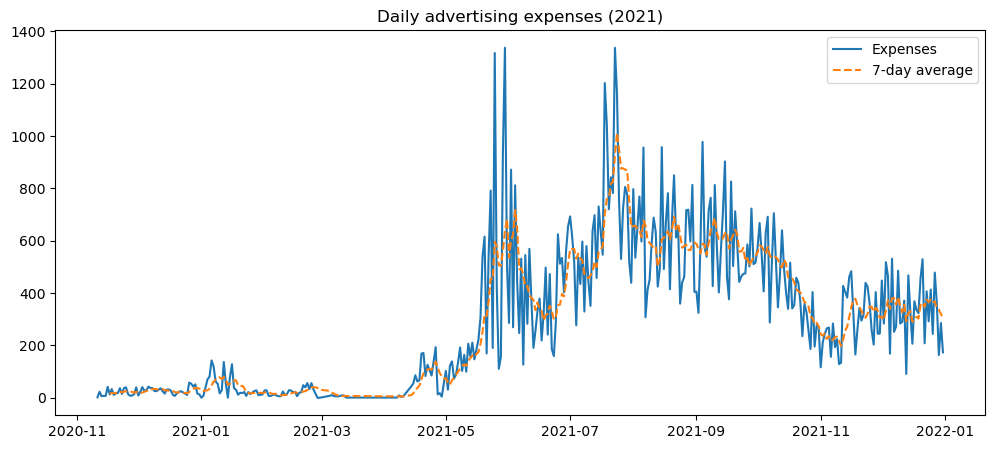

In [13]:
# 1.1 A chart with the daily total advertising expenses in 2021;
plt.figure(figsize=(12,5))
plt.plot(daily['ad_date'], daily['total_spend'], label="Expenses")
plt.plot(daily['ad_date'], daily['total_spend'].rolling(7).mean(), label="7-day average", linestyle="--")
plt.title("Daily advertising expenses (2021)")
plt.legend()
plt.show()

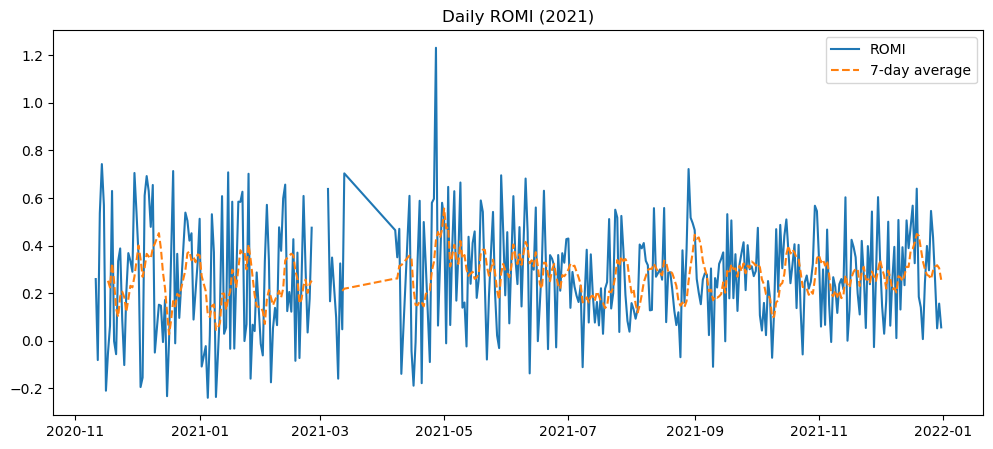

In [11]:
# 1.2 Chart of daily ROMI in 2021
plt.figure(figsize=(12,5))
plt.plot(daily['ad_date'], daily['ROMI'], label="ROMI")
plt.plot(daily['ad_date'], daily['ROMI'].rolling(7).mean(), label="7-day average", linestyle="--")
plt.title("Daily ROMI (2021)")
plt.legend()
plt.show()

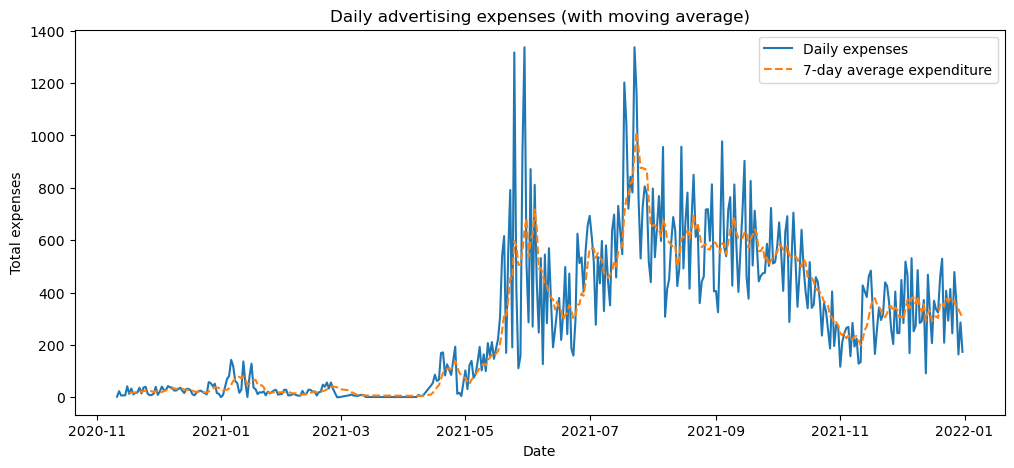

In [14]:
# 1.3 Bonus mini-task: apply the rolling() method to display the moving average of expenses and ROMI.
plt.figure(figsize=(12,5))
plt.plot(daily['ad_date'], daily['total_spend'], label="Daily expenses")
plt.plot(daily['ad_date'], daily['total_spend'].rolling(7).mean(), 
         label="7-day average expenditure", linestyle="--")
plt.title("Daily advertising expenses (with moving average)")
plt.xlabel("Date")
plt.ylabel("Total expenses")
plt.legend()
plt.show()

In [15]:
daily['ROMI'] = (daily['total_value'] - daily['total_spend']) / daily['total_spend']

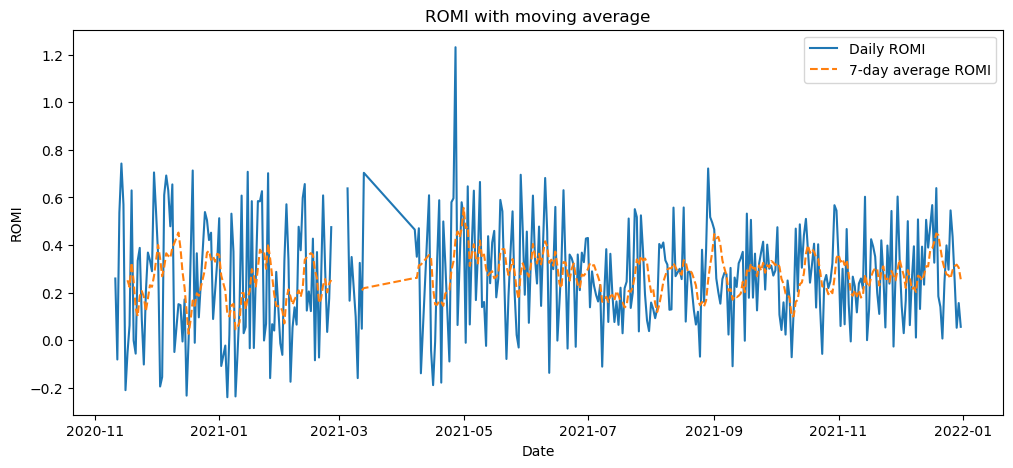

In [16]:
plt.figure(figsize=(12,5))
plt.plot(daily['ad_date'], daily['ROMI'], label="Daily ROMI")
plt.plot(daily['ad_date'], daily['ROMI'].rolling(7).mean(), 
         label="7-day average ROMI", linestyle="--")
plt.title("ROMI with moving average")
plt.xlabel("Date")
plt.ylabel("ROMI")
plt.legend()
plt.show()

In [17]:
# 2. Group the data by campaign name.
campaigns = df_fac.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index()
campaigns['ROMI'] = (campaigns['total_value'] - campaigns['total_spend']) / campaigns['total_spend']

In [18]:
campaigns.sample(5)

,campaign_name,total_spend,total_value,ROMI
1,Crazy discounts,2175.29,2583.59,0.187699
0,Brand,539.92,670.15,0.241202
7,New items,2936.97,3742.05,0.274119
10,Wholesale,14181.71,17421.33,0.228436
5,Hobbies,11326.97,13974.63,0.233748


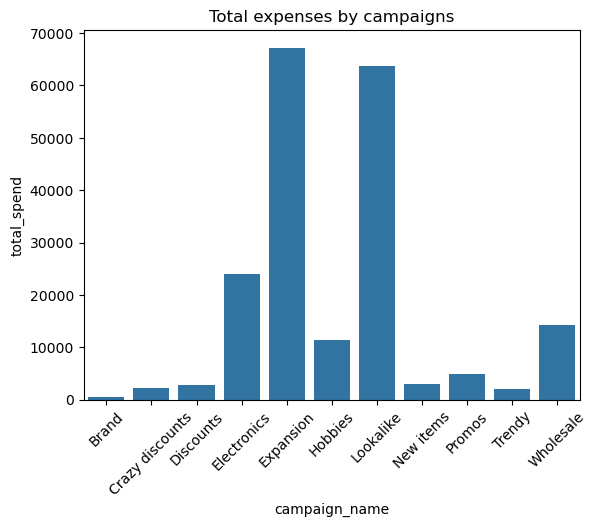

In [19]:
# 2.1 Chart of the total advertising expenditure in each campaign;
sns.barplot(data=campaigns, x='campaign_name', y='total_spend')
plt.title("Total expenses by campaigns")
plt.xticks(rotation=45)
plt.show()

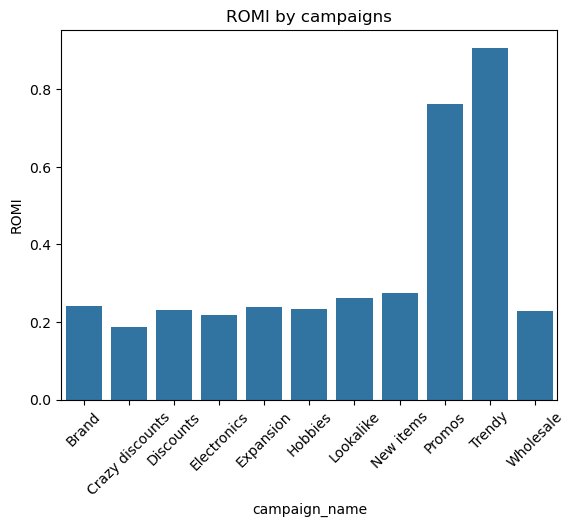

In [20]:
# 2.2 Overall ROMI in each of the campaigns.
sns.barplot(data=campaigns, x='campaign_name', y='ROMI')
plt.title("ROMI by campaigns")
plt.xticks(rotation=45)
plt.show()

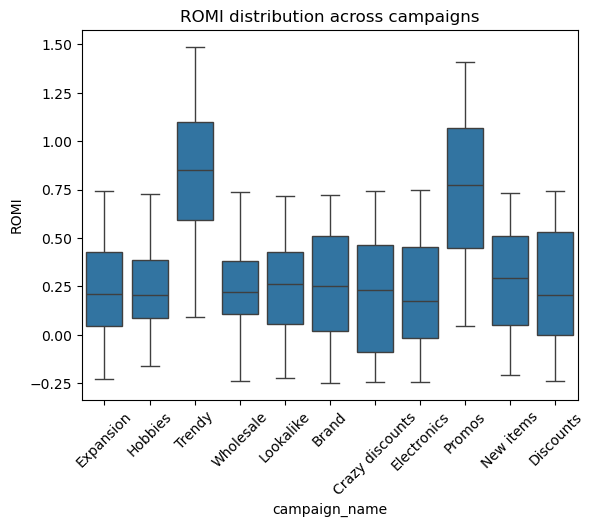

In [21]:
# 3. Using the box plot, determine the variation of daily ROMI in each campaign (by the name of the campaign).
df_fac['ROMI'] = (df_fac['total_value'] - df_fac['total_spend']) / df_fac['total_spend']
sns.boxplot(data=df_fac, x='campaign_name', y='ROMI')
plt.title("ROMI distribution across campaigns")
plt.xticks(rotation=45)
plt.show()


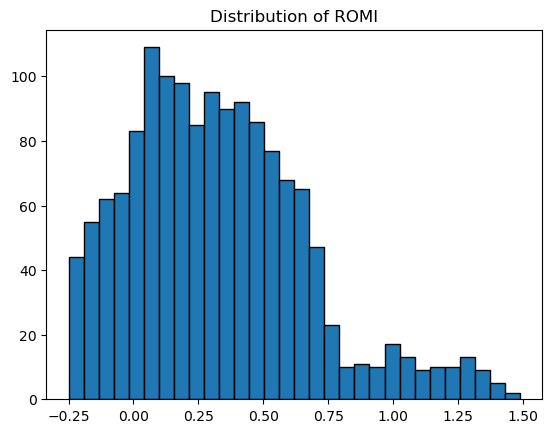

In [22]:
# 4. Build a histogram with the distribution of ROMI values in the facebook_ads_data.csv table.
plt.hist(df_fac['ROMI'], bins=30, edgecolor='black')
plt.title("Distribution of ROMI")
plt.show()

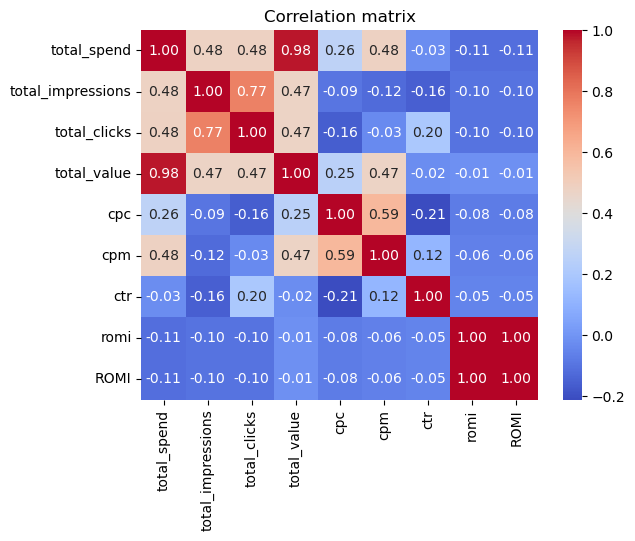

In [23]:
# 5. Build a heat map of correlation between all numerical indicators in the facebook_ads_data.csv table.
corr = df_fac.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [24]:
# 5.1 Which indicators have the highest and lowest correlation?
corr_unstacked = corr.unstack().sort_values()
print("The lowest correlation:")
print(corr_unstacked.head(10))

The lowest correlation:
ctr                cpc                 -0.210719
cpc                ctr                 -0.210719
total_clicks       cpc                 -0.159521
cpc                total_clicks        -0.159521
ctr                total_impressions   -0.155701
total_impressions  ctr                 -0.155701
                   cpm                 -0.121094
cpm                total_impressions   -0.121094
romi               total_spend         -0.114859
total_spend        romi                -0.114859
dtype: float64
